In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import pandas as pd
import nltk

df = pd.read_csv("noticias_sample.csv").dropna()
df.iloc[3, 0]

'Este lunes, de cara a una semana clave para la reforma a la salud en el Congreso de la República, David Racero, presidente de la Cámara de Representantes, habló sobre las expectativas de la bancada de Gobierno en torno a la iniciativa. De acuerdo con el congresista, esta lograría aprobarse en primer debate entre el miércoles y el jueves. “Se ha venido tejiendo de manera muy cuidadosa el acuerdo final respecto al proyecto de salud definitivo. Esperamos que esta semana se apruebe la ponencia positiva y el articulado. Es decir, en dos semanas estaríamos aprobando la reforma a la salud en la plenaria de la Cámara”, manifestó el presidente de esa corporación. La idea, según Racero, es lograr los acuerdos con los partidos para la aprobación de la reforma en la Comisión Séptima de la Cámara de Representantes. De esta forma, se facilitará la aprobación en los próximos debates. “Así que estamos en el momento de mayor tensión, de mayor diálogo en los puntos más neurálgicos, pero seguimos con el

In [2]:
df

,content,date,headline,description
0,"Esta semana, el Senado y la Cámara de Represen...",2022-11-10T18:42:14.884Z,"“Con algunas excepciones, un abusivo es un pas...",El senador del Pacto Histórico se refirió al c...
1,"Hace pocas horas, el expresidente interino de ...",2023-04-24T13:58:31.866Z,Gustavo Bolívar se pronunció sobre visita a Co...,El expresidente interino de Venezuela llegará ...
2,En medio de la preocupación que han elevado va...,2023-03-24T14:53:30.902Z,“Recibimos el país inundado en coca”: fuerte s...,El funcionario diplomático del Gobierno del pr...
3,"Este lunes, de cara a una semana clave para la...",2023-04-24T20:03:25.019Z,“Esperamos que entre miércoles y jueves se ten...,El presidente de la Cámara de Representantes e...
4,"Sin duda, el presidente Gustavo Petro, el mini...",2023-03-24T02:57:29.758Z,"Tras fracaso de la reforma política, Gobierno ...",Aunque esa decisión se pudo tomar desde el sem...
...,...,...,...,...
495,Más de 50 representantes del sector emprendedo...,2022-10-19T00:18:36.429Z,“Nos toca irnos del país para seguir subsistie...,Los voceros de pequeñas y medianas empresas as...
496,"Gilberto Tobón Sanín, excandidato al Senado de...",2022-11-30T05:02:30.124Z,"“No le hago mandados a nadie, soy autónomo”: G...",El aspirante afirmó que su “compromiso es con ...
497,Las diferencias entre el senador de la bancada...,2022-11-30T15:18:07.075Z,Gustavo Bolívar arremete en contra del senador...,"El ministro de Hacienda, presente en el debate..."
498,"En la tarde de este jueves, 24 de noviembre, e...",2022-11-25T04:26:26.611Z,"El ministro del Interior, Alfonso Prada, fue d...",Con el Puerto Pisisí esperan mover 1. 630.000 ...


In [3]:
# Initialize the CountVectorizer
vectorizer_count = CountVectorizer(ngram_range=(1,3))

# Train the CountVectorizer and transform the texts
articles_embeddings = vectorizer_count.fit_transform(df['content']).todense()

# Extract the vocabulary and the corresponding frequencies
vocabulary = vectorizer_count.get_feature_names_out()
frequencies = articles_embeddings.sum(axis=0).A1

# Sort the tokens by frequency in descending order
sorted_indices = frequencies.argsort()[::-1]

# Display the most frequent tokens along with their frequencies
for idx in sorted_indices[0:10]:
    print(f"{vocabulary[idx]}: {frequencies[idx]}")

de: 26521
la: 18648
que: 16888
el: 14592
en: 12087
los: 6466
se: 6030
del: 5917
las: 5102
no: 5048


In [4]:
len(vocabulary)

483100

In [5]:
articles_embeddings.shape

(492, 483100)

In [6]:
# Initialize the CountVectorizer
vectorizer_count = CountVectorizer(max_features=2000, ngram_range=(1,3))

# Train the CountVectorizer and transform the texts
articles_embeddings = vectorizer_count.fit_transform(df['content']).todense()

# Extract the vocabulary and the corresponding frequencies
vocabulary = vectorizer_count.get_feature_names_out()

len(vocabulary)

2000

In [7]:
articles_embeddings.shape

(492, 2000)

In [8]:
# Download the NLTK Spanish stopwords if you haven't already
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

spanish_stopwords[0:20]

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo']

In [9]:
len(spanish_stopwords)

313

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import pandas as pd
import nltk

df = pd.read_csv("noticias_sample.csv").dropna()

# Download the NLTK Spanish stopwords if you haven't already
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

# Initialize the CountVectorizer
vectorizer_count = CountVectorizer(max_features=2000, stop_words=spanish_stopwords, ngram_range=(1,3))

# Train the CountVectorizer and transform the texts
articles_embeddings = vectorizer_count.fit_transform(df['content']).todense()

# Extract the vocabulary and the corresponding frequencies
vocabulary = vectorizer_count.get_feature_names_out()
frequencies = articles_embeddings.sum(axis=0).A1

# Sort the tokens by frequency in descending order
sorted_indices = frequencies.argsort()[::-1]

# Display the most frequent tokens along with their frequencies
for idx in sorted_indices[0:10]:
    print(f"{vocabulary[idx]}: {frequencies[idx]}")

petro: 1786
gobierno: 1760
presidente: 1573
semana: 994
país: 936
colombia: 904
gustavo: 896
si: 885
gustavo petro: 778
dijo: 741


In [11]:
# Initialize the CountVectorizer
vectorizer_count = CountVectorizer(max_features=2000, stop_words=spanish_stopwords, ngram_range=(2,3))

# Train the CountVectorizer and transform the texts
articles_embeddings = vectorizer_count.fit_transform(df['content']).todense()

# Extract the vocabulary and the corresponding frequencies
vocabulary = vectorizer_count.get_feature_names_out()
frequencies = articles_embeddings.sum(axis=0).A1

# Sort the tokens by frequency in descending order
sorted_indices = frequencies.argsort()[::-1]

# Display the most frequent tokens along with their frequencies
for idx in sorted_indices[0:10]:
    print(f"{vocabulary[idx]}: {frequencies[idx]}")

gustavo petro: 778
presidente gustavo: 397
presidente gustavo petro: 397
pacto histórico: 369
presidente petro: 271
gobierno nacional: 202
centro democrático: 199
reforma salud: 176
paz total: 162
reforma tributaria: 161


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import pandas as pd
import nltk

df = pd.read_csv("noticias_sample.csv").dropna()

# Download the NLTK Spanish stopwords if you haven't already
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

# Initialize the TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=2000, stop_words=spanish_stopwords, ngram_range=(1,3), lowercase=True)

# Train the TfidfVectorizer and transform the texts
X_tfidf = vectorizer_tfidf.fit_transform(df['content']).todense()

# Initialize the CountVectorizer
vectorizer_count = CountVectorizer(max_features=2000, stop_words=spanish_stopwords, ngram_range=(1,3), lowercase=True)

# Train the CountVectorizer and transform the texts
X_count = vectorizer_count.fit_transform(df['content']).todense()

# Get the feature names (tokens) for both vectorizers
feature_names_tfidf = vectorizer_tfidf.get_feature_names()
feature_names_count = vectorizer_count.get_feature_names()

# For each text, find the top five features and print the tokens separated by a comma
top_tokens_tfidf = []
top_tokens_count = []
for i, text in enumerate(df['content']):
    row_tfidf = X_tfidf[i][0]
    row_count = X_count[i][0]
    top_five_feature_indices_tfidf = np.array(row_tfidf.argsort())[0][-5:][::-1]
    top_five_feature_indices_count = np.array(row_count.argsort())[0][-5:][::-1]
    top_five_feature_tokens_tfidf = ", ".join([feature_names_tfidf[idx] for idx in top_five_feature_indices_tfidf])
    top_five_feature_tokens_count = ", ".join([feature_names_count[idx] for idx in top_five_feature_indices_count])
    top_tokens_tfidf.append(top_five_feature_tokens_tfidf)
    top_tokens_count.append(top_five_feature_tokens_count)

# Add the top tokens to the DataFrame
df['top_tokens_tfidf'] = top_tokens_tfidf
df['top_tokens_count'] = top_tokens_count

# Example where TFIDF works better
df.iloc[80]

/Users/zarruk/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


content             El excandidato presidencial Carlos Amaya se re...
date                                         2022-10-05T18:25:44.192Z
headline            “Con los altos impuestos al carbón, Boyacá res...
description         El exgobernador de ese departamento alertó que...
top_tokens_tfidf     minero, sector, carbón, tributaria, departamento
top_tokens_count                sector, si, afirmó, van, departamento
Name: 81, dtype: object

In [14]:
df.iloc[80]['headline']

'“Con los altos impuestos al carbón, Boyacá resultará pagando buena parte de la reforma tributaria”: Carlos Amaya'

In [15]:
df.iloc[80]['top_tokens_count']

'sector, si, afirmó, van, departamento'

In [16]:
df.iloc[80]['top_tokens_tfidf']

'minero, sector, carbón, tributaria, departamento'

In [17]:
df.iloc[8]['headline']

'“O acabamos esa mesa técnica y nos vamos como él quiere a las calles”, frase de la ministra del Trabajo Gloria Inés Ramírez contra Rappi, que levantó polémica'

In [18]:
df.iloc[8]['top_tokens_count']

'ministra, empresa, ramírez, capital, si'

In [19]:
df.iloc[8]['top_tokens_tfidf']

'empresa, ramírez, ministra, capital, lafaurie'

In [20]:
df.iloc[15]['headline']

'“Duque y Molano le mintieron al país”: Iván Mordisco se refiere a su supuesta muerte'

In [21]:
df.iloc[15]['top_tokens_count']

'paz, gobierno, acuerdo, país, iván'

In [22]:
df.iloc[15]['top_tokens_tfidf']

'paz, farc, mordisco, iván mordisco, iván'

In [23]:
import pandas as pd

df_educacion = pd.read_csv("noticias_educacion_sample.csv")
df_educacion['clase'] = 0
df_politica = pd.read_csv("noticias_politica_sample.csv")
df_politica['clase'] = 1
df_deportes = pd.read_csv("noticias_deportes_sample.csv")
df_deportes['clase'] = 2
df_economia = pd.read_csv("noticias_economia_sample.csv")
df_economia['clase'] = 3
df = pd.concat([df_educacion, df_politica, df_deportes, df_economia]).dropna().reset_index()

In [24]:
df

,index,content,date,headline,description,clase
0,0,Como parte de la política de puertas abiertas ...,2022-02-08T19:12:01.737Z,La CAN abre convocatorias para pasantías en Co...,La Comunidad Andina de Naciones abrió la posib...,0
1,1,"El programa, que cumple 30 años desde su prime...",2022-05-14T18:02:23.629Z,Colfuturo apoyará a 1.526 profesionales colomb...,"Los beneficiarios, en su mayoría, realizaron e...",0
2,2,Estudiar una carrera universitaria en Colombia...,2022-10-19T09:45:01.712Z,¿Cómo estudiar becado en la mejor universidad ...,"Según el ranking de Times Higher Education, la...",0
3,3,Escuche aquí el episodio número 27 de Finanzas...,2021-04-07T17:56:34.238Z,Consejos para financiar con inteligencia sus e...,Si estudiar es uno de sus principales objetivo...,0
4,4,Durante el último año de la carrera universita...,2022-04-02T18:08:22.865Z,Pruebas Saber Pro: el listado de universidades...,Las universidades públicas presentaron preocup...,0
...,...,...,...,...,...,...
1928,495,Colombia sigue aumentando su endeudamiento ext...,2023-02-10T23:08:47.922Z,"Deuda externa de Colombia representó el 52,8% ...",Así lo deja en evidencia el más reciente repor...,3
1929,496,La Agencia de Estados Unidos para el Desarroll...,2022-09-28T17:00:15.603Z,Lanzan convocatoria para apoyar a más de mil o...,La Usaid estará al frente de este proceso que ...,3
1930,497,La inflación es uno de los mayores retos que e...,2023-02-25T03:41:20.639Z,Controlar la inflación no será tan fácil como ...,El aumento en los precios será una constante e...,3
1931,498,23 lugares icónicos de Cúcuta fueron decorados...,2022-12-07T17:16:46.317Z,Reapertura económica en la frontera: artesanas...,Cúcuta prepara la Ruta Navideña luego de haber...,3


In [25]:
df.loc[0, 'content']

'Como parte de la política de puertas abiertas a las nuevas generaciones andinas, el secretario general de la Comunidad Andina de Naciones (CAN), Jorge Hernando Pedraza, anunció la convocatoria al XI programa de pasantías profesionales en el organismo andino “practiCAN”. Según se informó, podrán aplicar estudiantes universitarios que estén cursando el último semestre académico, egresados, técnicos y profesionales recién titulados en un tiempo no mayor a un año de diferentes escuelas y facultades universitarias de Bolivia, Colombia, Ecuador y Perú. “Esta iniciativa busca fortalecer una mayor vinculación de los jóvenes de los países miembros con el proceso andino de integración e impulsar que las nuevas generaciones asuman un rol más activo en la región desarrollando sus capacidades profesionales en las diversas áreas de la Secretaría General”, señaló el jefe del organismo. Podrán ser parte de “practiCAN 2022″, los jóvenes de las carreras Comercio Exterior, Relaciones Internacionales, Ne

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import pandas as pd
import nltk

# Download the NLTK Spanish stopwords if you haven't already
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

# Initialize the TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=2000, stop_words=spanish_stopwords, ngram_range=(1,3), lowercase=True)

df = df[['content', 'clase']].dropna()

# Train the TfidfVectorizer and transform the texts
X_tfidf = vectorizer_tfidf.fit_transform(df['content']).todense()
y = df['clase']

In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1928    3
1929    3
1930    3
1931    3
1932    3
Name: clase, Length: 1933, dtype: int64

In [30]:
X_tfidf[0].shape

(1, 2000)

In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import xgboost as xgb

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=1)

# train XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# make predictions on test set
y_pred = model.predict(X_test)

# compute precision, recall, and F1 score for each class
num_classes = len(set(y_test))
precision_scores = []
recall_scores = []
f1_scores = []
for i in range(num_classes):
    class_predicted = [1 if x == i else 0 for x in y_pred]
    class_real = [1 if x == i else 0 for x in y_test]
    precision = precision_score(class_real, class_predicted)
    recall = recall_score(class_real, class_predicted)
    f1 = f1_score(class_real, class_predicted)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# print results
for i in range(num_classes):
    print("Class {}: Precision: {:.2f}, Recall: {:.2f}, F1 score: {:.2f}".format(i, precision_scores[i], recall_scores[i], f1_scores[i]))

# get feature importances and vocabulary
feature_importances = model.feature_importances_
vocabulary = vectorizer_tfidf.get_feature_names()

# print the top 10 tokens with the largest feature importance
indices = feature_importances.argsort()[::-1]
print("Top 10 tokens with largest feature importance:")
for i in range(10):
    print("{:<15} {:.2f}%".format(vocabulary[indices[i]], feature_importances[indices[i]]*100))

Class 0: Precision: 0.92, Recall: 0.91, F1 score: 0.91
Class 1: Precision: 0.88, Recall: 0.91, F1 score: 0.90
Class 2: Precision: 0.98, Recall: 1.00, F1 score: 0.99
Class 3: Precision: 0.85, Recall: 0.81, F1 score: 0.83
Top 10 tokens with largest feature importance:
inflación       4.79%
fútbol          4.51%
estudiantes     3.26%
congresistas    2.46%
sena            1.84%
aerolínea       1.81%
petro           1.77%
senadores       1.52%
octavos         1.45%
equipo          1.36%


/Users/zarruk/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import pandas as pd

# normalize TF-IDF embeddings
tfidf_embeddings_normalized = normalize(X_tfidf)

# perform k-means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(tfidf_embeddings_normalized)

# get feature importances and vocabulary
feature_importances = kmeans.cluster_centers_
vocabulary = vectorizer_tfidf.vocabulary_

# print the top 5 most important features of each cluster
print("Top n most important features of each cluster:")
for i in range(num_clusters):
    indices = np.argsort(feature_importances[i])[::-1][:10]
    features = [list(vocabulary.keys())[list(vocabulary.values()).index(index)] for index in indices]
    print("Cluster {}: {}".format(i+1, features))


/Users/zarruk/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Top n most important features of each cluster:
Cluster 1: ['petro', 'gobierno', 'presidente', 'gustavo', 'paz', 'reforma', 'gustavo petro', 'congreso', 'salud', 'semana']
Cluster 2: ['equipo', 'fútbol', 'partido', 'mundial', 'selección', 'copa', 'final', 'qatar', 'jugadores', 'argentina']
Cluster 3: ['educación', 'estudiantes', 'universidad', 'niños', 'colegios', 'jóvenes', 'programa', 'instituciones', 'superior', 'pandemia']
Cluster 4: ['inflación', 'pesos', 'año', 'precios', 'colombia', 'precio', 'mercado', '000', 'país', 'tasas']


In [40]:
df.loc[200, 'content']

'A\xa0comienzos\xa0de 2019, con todos los actores del sistema de educación superior en el país, empezó labores\xa0la Comisión de Reforma Integral del\xa0Icetex, la cual fue creada con el\xa0objetivo principal de lograr cambios de fondo en la entidad ante el inconformismo de muchos usuarios\xa0y la cantidad de jóvenes deudores en mora.\xa0En diciembre pasado, esta comisión obtuvo los primeros resultados. El Ministerio de Educación y el Icetex anunciaron un plan de alivios compuesto por ocho\xa0medidas que buscan\xa0beneficiar a cerca de 120.000 usuarios de préstamos educativos.\nEl anuncio fue celebrado por los diferentes actores del sistema y\xa0el presidente Iván Duque calificó ese plan de alivios como el inicio de lo que él denominó "el revolcón al Icetex".\n\n \n\nNo obstante,\xa0seis meses después de ese anuncio, esa reforma estructural a la entidad está en veremos, según denuncian varios representantes de estudiantes y usuarios. Las principales asociaciones de estudiantes universi

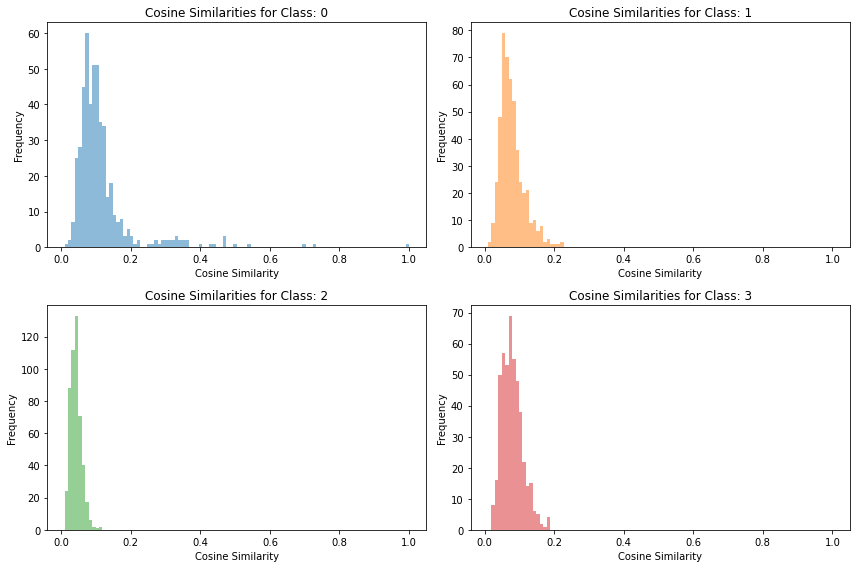

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

cosine_similarities = cosine_similarity(tfidf_embeddings_normalized[200].reshape(1, -1), tfidf_embeddings_normalized).reshape(-1)
df['similarities'] = cosine_similarities
grouped_similarities = df.groupby('clase')['similarities'].apply(list)

# Determine the common range for the x-axis
min_value = df['similarities'].min()
max_value = df['similarities'].max()
bins = 100
common_range = (min_value, max_value)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, (class_name, similarities) in enumerate(grouped_similarities.items()):
    axes[i].hist(similarities, bins=bins, range=common_range, alpha=0.5, label=class_name, color=f"C{i}")
    axes[i].set_title(f'Cosine Similarities for Class: {class_name}')
    axes[i].set_xlabel('Cosine Similarity')
    axes[i].set_ylabel('Frequency')

fig.tight_layout()
plt.show()

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


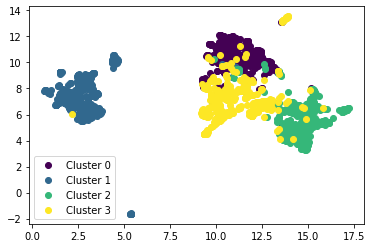

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt

# perform UMAP dimensionality reduction on all data points
umap_embeddings = umap.UMAP().fit_transform(tfidf_embeddings_normalized)

# assign a color to each cluster label
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, num_clusters)]

# plot all data points with different colors and labels for each cluster
for i in range(num_clusters):
    # get the indices of data points in this cluster
    indices = kmeans.labels_ == i
    # plot the data points with a different color and label name for this cluster
    plt.scatter(umap_embeddings[indices, 0], umap_embeddings[indices, 1], c=[colors[i]], label=f'Cluster {i}')
    
# add legend to the plot
plt.legend()

# show the plot
plt.show()

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import pandas as pd

df_subclusters = df_politica[['content', 'clase']].dropna()

# Train the TfidfVectorizer and transform the texts
X_tfidf = vectorizer_tfidf.fit_transform(df_subclusters['content']).todense()
y = df['clase']

# normalize TF-IDF embeddings
tfidf_embeddings_normalized = normalize(X_tfidf)

# perform k-means clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(tfidf_embeddings_normalized)

# get feature importances and vocabulary
feature_importances = kmeans.cluster_centers_
vocabulary = vectorizer_tfidf.vocabulary_

# print the top 5 most important features of each cluster
print("Top n most important features of each cluster:")
for i in range(num_clusters):
    indices = np.argsort(feature_importances[i])[::-1][:10]
    features = [list(vocabulary.keys())[list(vocabulary.values()).index(index)] for index in indices]
    print("Cluster {}: {}".format(i+1, features))


/Users/zarruk/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Top n most important features of each cluster:
Cluster 1: ['maduro', 'venezuela', 'colombia', 'unidos', 'petro', 'biden', 'presidente', 'brasil', 'relaciones', 'nicolás maduro']
Cluster 2: ['salud', 'reforma', 'reforma salud', 'eps', 'sistema', 'corcho', 'partido', 'ministra', 'sistema salud', 'gobierno']
Cluster 3: ['petro', 'partido', 'presidente', 'gobierno', 'democrático', 'cabal', 'centro', 'centro democrático', 'oposición', 'gustavo']
Cluster 4: ['fiscal', 'barbosa', 'justicia', 'fiscalía', 'general', 'denuncia', 'contratos', 'sometimiento', 'fiscal general', 'víctimas']
Cluster 5: ['gas', 'vélez', 'ministra', 'energía', 'minas', 'moción', 'censura', 'irene', 'moción censura', 'petróleo']
Cluster 6: ['semana', 'usted', 'creo', 'dije', 'petro', 'cómo', 'si', 'gente', 'va', 'cree']
Cluster 7: ['barreras', 'congreso', 'pacto', 'senado', 'roy', 'pacto histórico', 'roy barreras', 'histórico', 'reforma política', 'presidente']
Cluster 8: ['tributaria', 'reforma', 'reforma tributaria', 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import pandas as pd

df_subclusters = df_deportes[['content', 'clase']].dropna()

# Train the TfidfVectorizer and transform the texts
X_tfidf = vectorizer_tfidf.fit_transform(df_subclusters['content']).todense()
y = df['clase']

# normalize TF-IDF embeddings
tfidf_embeddings_normalized = normalize(X_tfidf)

# perform k-means clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(tfidf_embeddings_normalized)

# get feature importances and vocabulary
feature_importances = kmeans.cluster_centers_
vocabulary = vectorizer_tfidf.vocabulary_

# print the top 5 most important features of each cluster
print("Top n most important features of each cluster:")
for i in range(num_clusters):
    indices = np.argsort(feature_importances[i])[::-1][:10]
    features = [list(vocabulary.keys())[list(vocabulary.values()).index(index)] for index in indices]
    print("Cluster {}: {}".format(i+1, features))


/Users/zarruk/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Top n most important features of each cluster:
Cluster 1: ['qatar', 'mundial', 'fifa', 'mundo', 'país', 'copa mundo', 'derechos', 'fútbol', 'copa', '2022']
Cluster 2: ['messi', 'argentina', 'mundial', 'mundo', 'qatar', 'final', 'lionel', 'copa', 'selección', 'partido']
Cluster 3: ['millonarios', 'junior', 'club', 'equipo', 'nacional', 'liga', 'deportivo', 'cali', 'fútbol', 'jugador']
Cluster 4: ['win', 'televisión win', 'televisión', 'vs', 'hora', 'estadio', 'hora 00 estadio', '00 estadio', 'hora 00', 'fc']
Cluster 5: ['team', 'etapa', 'col', 'ineos', 'ciclista', 'astana', 'vuelta', 'lópez', 'urán', 'ef']
Cluster 6: ['colombia', 'selección', 'sub', 'tricolor', 'selección colombia', 'femenina', 'lorenzo', 'mundial', 'fútbol', 'sub 17']
Cluster 7: ['madrid', 'partido', 'real', 'equipo', 'real madrid', 'gol', 'minutos', 'tras', 'puntos', 'juego']
Cluster 8: ['liverpool', 'díaz', 'united', 'luis díaz', 'luis', 'manchester', 'klopp', 'premier', 'league', 'colombiano']
Cluster 9: ['james', '

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import pandas as pd

df_subclusters = df_economia[['content', 'clase']].dropna()

# Train the TfidfVectorizer and transform the texts
X_tfidf = vectorizer_tfidf.fit_transform(df_subclusters['content']).todense()
y = df['clase']

# normalize TF-IDF embeddings
tfidf_embeddings_normalized = normalize(X_tfidf)

# perform k-means clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(tfidf_embeddings_normalized)

# get feature importances and vocabulary
feature_importances = kmeans.cluster_centers_
vocabulary = vectorizer_tfidf.vocabulary_

# print the top 5 most important features of each cluster
print("Top n most important features of each cluster:")
for i in range(num_clusters):
    indices = np.argsort(feature_importances[i])[::-1][:10]
    features = [list(vocabulary.keys())[list(vocabulary.values()).index(index)] for index in indices]
    print("Cluster {}: {}".format(i+1, features))


/Users/zarruk/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Top n most important features of each cluster:
Cluster 1: ['inflación', 'banco', 'tasas', 'interés', 'fed', 'bancos', 'tasas interés', 'economía', 'unidos', 'puntos']
Cluster 2: ['aerolínea', 'viva', 'air', 'avianca', 'viva air', 'pasajeros', 'aerolíneas', 'vuelos', 'aeronáutica', 'transporte']
Cluster 3: ['vivienda', 'vehículos', 'programa', 'subsidio', 'año', 'hogares', 'subsidios', 'bogotá', 'sector', 'ciudad']
Cluster 4: ['energía', 'presidente', 'gas', 'gobierno', 'país', 'nacional', 'energética', 'colombia', 'ecopetrol', 'petro']
Cluster 5: ['dólares', 'millones', 'millones dólares', 'precios', 'año', 'producción', '2022', 'países', '000', '2023']
Cluster 6: ['salario', 'laboral', 'salud', '000', 'personas', 'trabajo', 'trabajadores', 'mínimo', 'salario mínimo', 'mujeres']
Cluster 7: ['pesos', 'dólar', 'centavos', 'precio', 'inflación', 'divisa', 'unidos', 'tasas', 'mercado', 'moneda']
Cluster 8: ['unidades', 'ecopetrol', 'bolsa', 'acciones', 'jornada', 'valores', 'bolsa valores'